In [1]:
# Cell 2: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Settings for display
%matplotlib inline
sns.set(style="whitegrid")



In [5]:
# Cell 3: Load the Dataset

df = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')
print('Shape:', df.shape)
df.head()


Shape: (9994, 11)


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [6]:
# Cell 4: Basic Data Exploration

df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [7]:
# Cell 5: Drop Missing Values and Duplicates (Data Cleaning)

# Drop any rows with missing values (if any)
df.dropna(inplace=True)

# Drop duplicate entries
df.drop_duplicates(inplace=True)

print("Data shape after cleaning:", df.shape)

Data shape after cleaning: (9994, 11)


In [8]:
# Cell 6: Parse 'Order Date' to datetime and Extract Date Features

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract day, month year
df['Order Day'] = df['Order Date'].dt.day
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

# Optional: Extract month name for plotting
df['Month'] = df['Order Date'].dt.strftime('%B')

df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year,Month
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,8.0,11.0,2017.0,November
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,8.0,11.0,2017.0,November
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,12.0,6.0,2017.0,June
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,11.0,10.0,2016.0,October
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,11.0,10.0,2016.0,October


In [9]:
# Cell 7: Encode Categorical Variables

le = LabelEncoder()
for col in ['Category', 'Sub Category', 'City', 'Region', 'State', 'Month']:
    df[col] = le.fit_transform(df[col])

df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year,Month
0,OD1,Harish,5,14,21,2017-11-08,2,1254,0.12,401.28,0,8.0,11.0,2017.0,9
1,OD2,Sudha,1,13,8,2017-11-08,3,749,0.18,149.80,0,8.0,11.0,2017.0,9
2,OD3,Hussain,3,0,13,2017-06-12,4,2360,0.21,165.20,0,12.0,6.0,2017.0,6
3,OD4,Jackson,4,12,4,2016-10-11,3,896,0.25,89.60,0,11.0,10.0,2016.0,10
4,OD5,Ridhesh,3,18,12,2016-10-11,3,2355,0.26,918.45,0,11.0,10.0,2016.0,10


C:\Users\Sumanth\AppData\Local\Temp\ipykernel_46172\1111033667.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=df, palette='Set2')


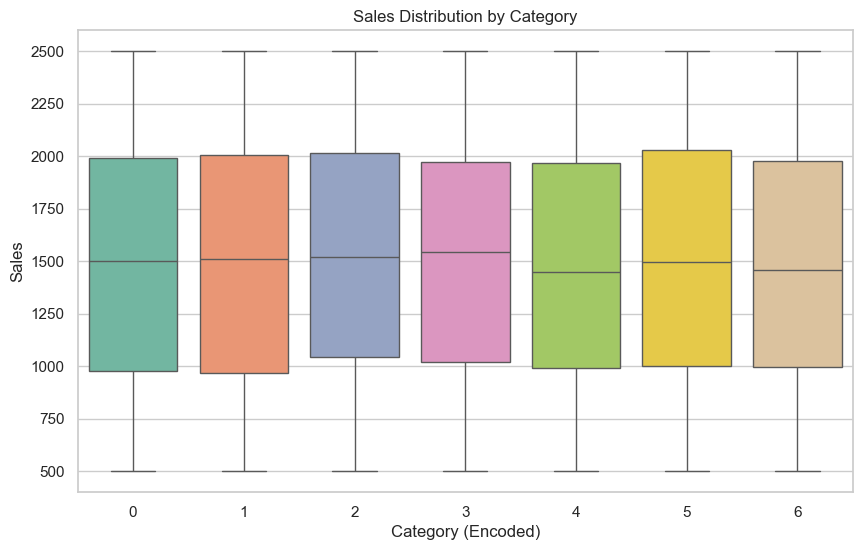

Category Encodings: {0: 'April', 1: 'August', 2: 'December', 3: 'February', 4: 'January', 5: 'July', 6: 'June', 7: 'March', 8: 'May', 9: 'November', 10: 'October', 11: 'September', 12: nan}


In [10]:
# Cell 8: Exploratory Data Analysis - Sales by Category

plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category (Encoded)')
plt.ylabel('Sales')
plt.show()

# For reference, print encoding
print("Category Encodings:", dict(enumerate(le.classes_)))

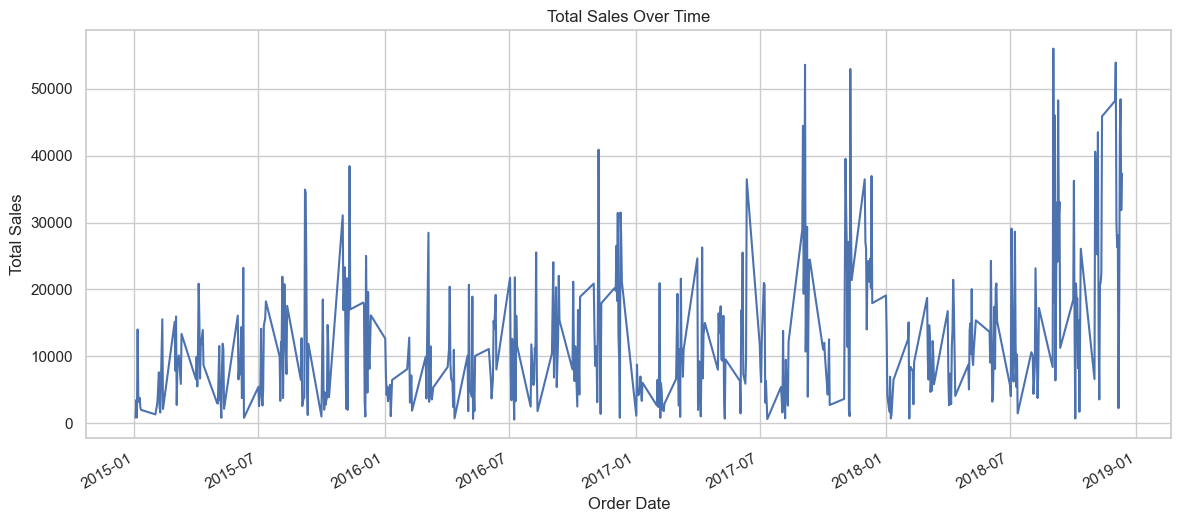

In [11]:
# Cell 9: Sales Trends Over Time

plt.figure(figsize=(14, 6))
df.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.show()

<Figure size 1200x600 with 0 Axes>

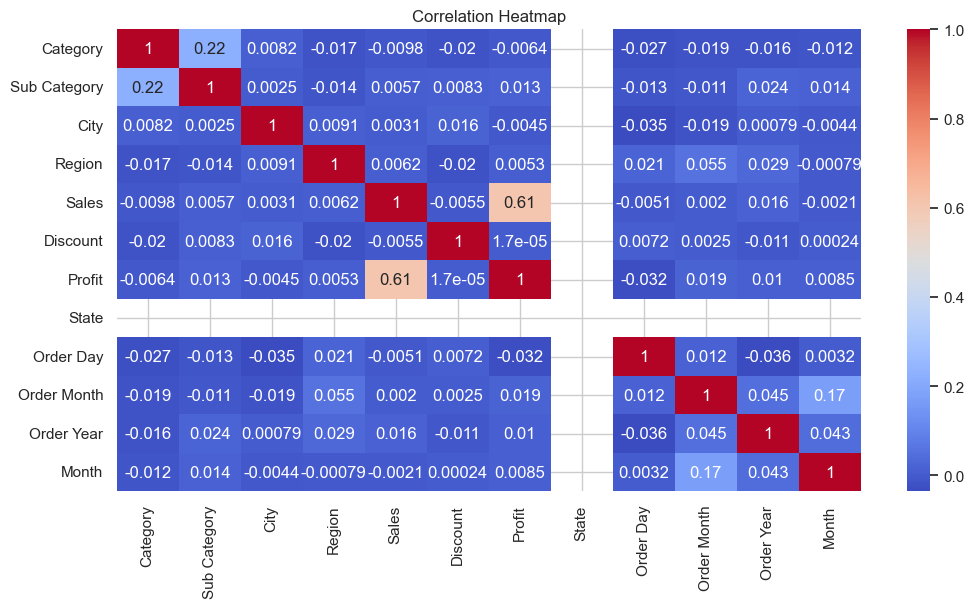

In [13]:
# Cell 10: Correlation Analysis

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 6))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


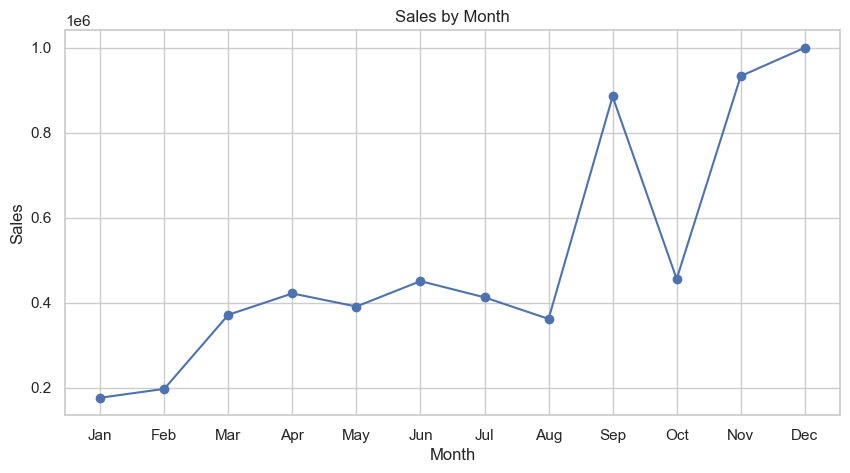

In [14]:
# Cell 11: Monthly Sales Pattern

monthly_sales = df.groupby('Order Month')['Sales'].sum().reindex(range(1,13), fill_value=0)

plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line', marker='o')
plt.xticks(np.arange(1,13), 
           [ 'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title("Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

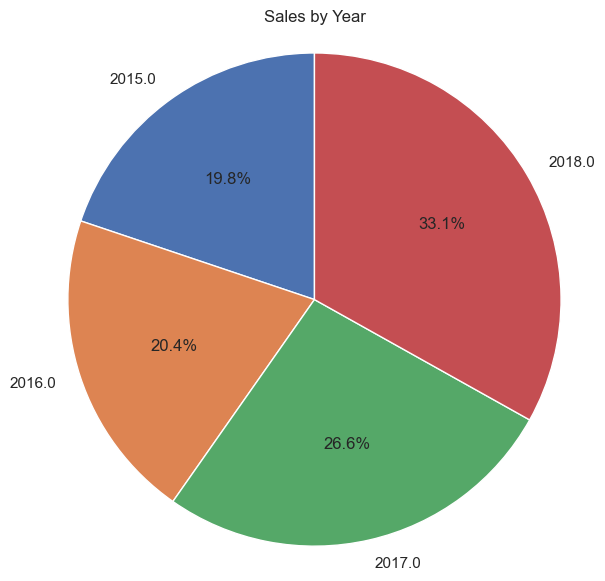

In [15]:
# Cell 12: Yearly Sales (Pie Chart)

yearly_sales = df.groupby('Order Year')['Sales'].sum()
plt.figure(figsize=(7, 7))
plt.pie(yearly_sales, labels=yearly_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales by Year')
plt.axis('equal')
plt.show()

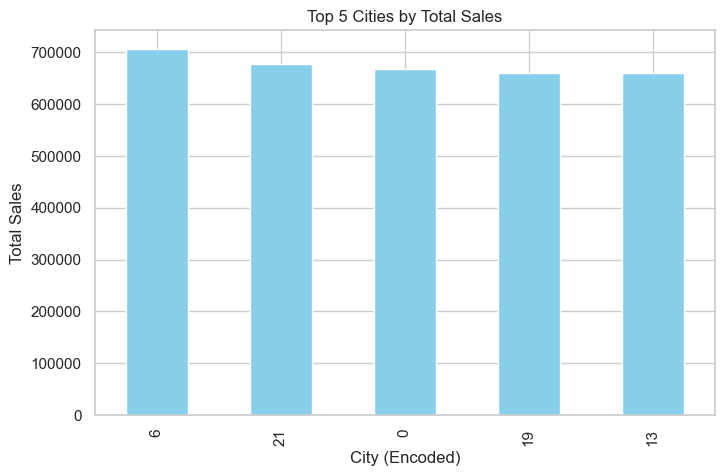

City Encodings: {0: 'April', 1: 'August', 2: 'December', 3: 'February', 4: 'January', 5: 'July', 6: 'June', 7: 'March', 8: 'May', 9: 'November', 10: 'October', 11: 'September', 12: nan}


In [16]:
# Cell 13: Top 5 Cities by Total Sales

city_sales = df.groupby('City')['Sales'].sum()
top_cities = city_sales.sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
top_cities.plot(kind='bar', color='skyblue')
plt.title('Top 5 Cities by Total Sales')
plt.xlabel('City (Encoded)')
plt.ylabel('Total Sales')
plt.show()

# Print city encoding for interpretation
print("City Encodings:", dict(enumerate(le.classes_)))

In [17]:
# Cell 14: Feature Selection for Modeling

# Drop features not used in model
# We'll predict 'Sales' using: category, subcategory, city, region, state, month, discount, profit
feature_columns = ['Category', 'Sub Category', 'City', 'Region', 'State', 'Order Month', 'Discount', 'Profit']

X = df[feature_columns]
y = df['Sales']

X.head()

,Category,Sub Category,City,Region,State,Order Month,Discount,Profit
0,5,14,21,2,0,11.0,0.12,401.28
1,1,13,8,3,0,11.0,0.18,149.80
2,3,0,13,4,0,6.0,0.21,165.20
3,4,12,4,3,0,10.0,0.25,89.60
4,3,18,12,3,0,10.0,0.26,918.45


In [18]:
# Cell 15: Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7995, 8) (1999, 8) (7995,) (1999,)


In [19]:
# Cell 16: Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Cell 17: Model Training - Linear Regression

from sklearn.impute import SimpleImputer

# Impute missing values BEFORE scaling
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [22]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


In [24]:
# Cell 18: Model Evaluation

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 212793.75
R^2 Score: 0.35


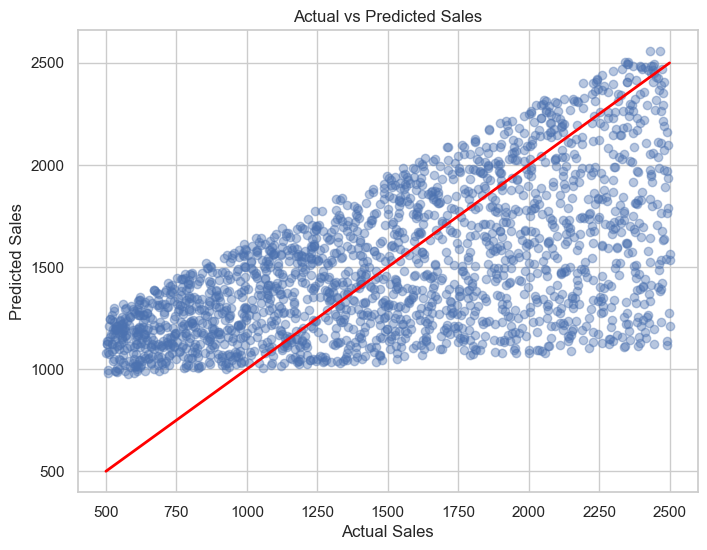

In [25]:
# Cell 19: Plot Actual vs Predicted Sales

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()

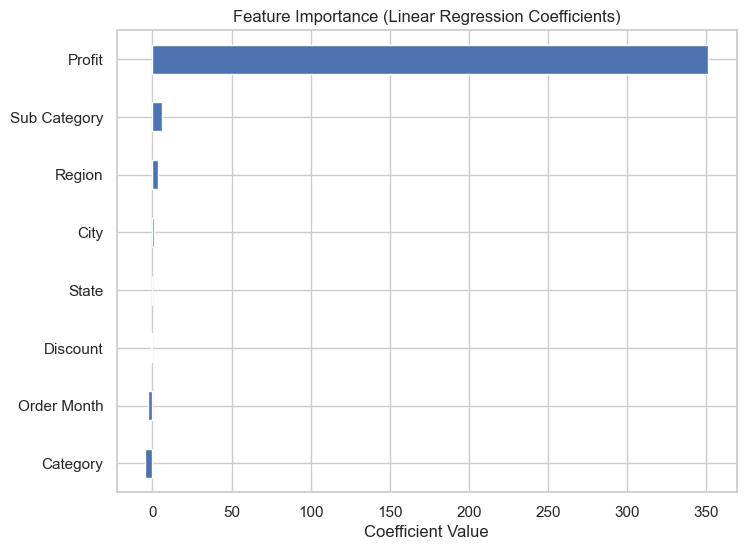

In [26]:
# Cell 20: (Optional) Feature Importance (Linear Regression Coefficients)

feature_importance = pd.Series(model.coef_, index=feature_columns)
feature_importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.show()

In [28]:
print("Number of unique customers:", df['Customer Name'].nunique())

Number of unique customers: 50


Customer Name
Krithika    334361
Amrish      333351
Verma       331665
Arutra      325720
Vidya       321798
Vinne       319565
Shah        318588
Suresh      315973
Adavan      315341
Surya       312645
Name: Sales, dtype: int64


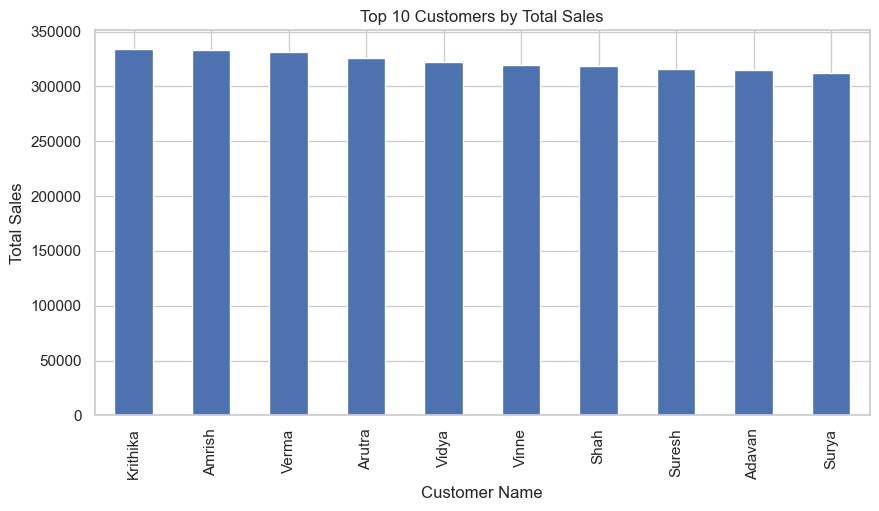

In [34]:
#Top customers by total sales

top_customers = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(10)
print(top_customers)
top_customers.plot(kind='bar', figsize=(10,5), title="Top 10 Customers by Total Sales")
plt.ylabel("Total Sales")
plt.show()

Number of unique cities: 24


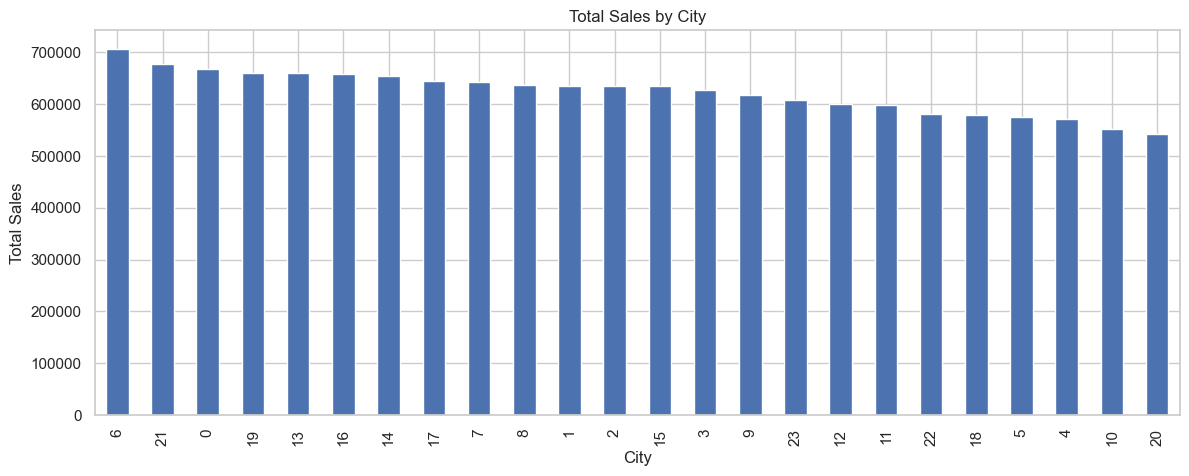

In [35]:
#City-wise Analysis
#Number of unique cities and sales per city
print("Number of unique cities:", df['City'].nunique())
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
city_sales.plot(kind='bar', figsize=(14,5), title='Total Sales by City')
plt.ylabel("Total Sales")
plt.show()

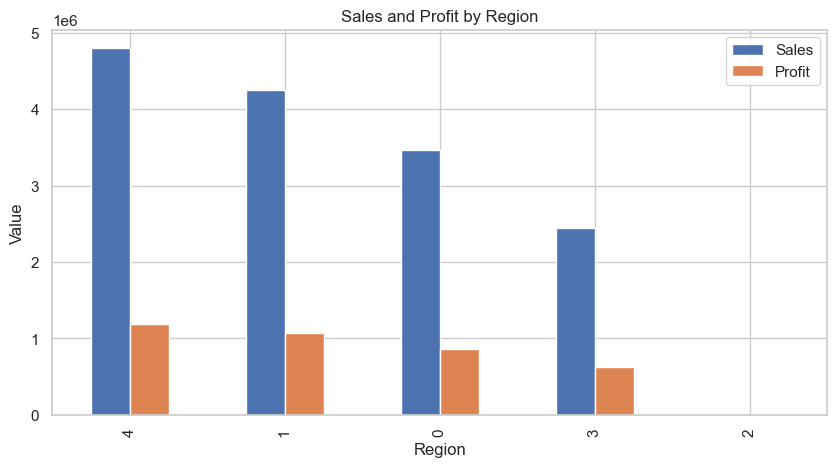

In [36]:
#Region/Customer Segmentation Analysis
#Sales and profit by region
region_sales = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
region_sales.plot(kind='bar', figsize=(10,5), title="Sales and Profit by Region")
plt.ylabel("Value")
plt.show()

C:\Users\Sumanth\AppData\Local\Temp\ipykernel_46172\1323773504.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df, ci=None, estimator=np.mean)


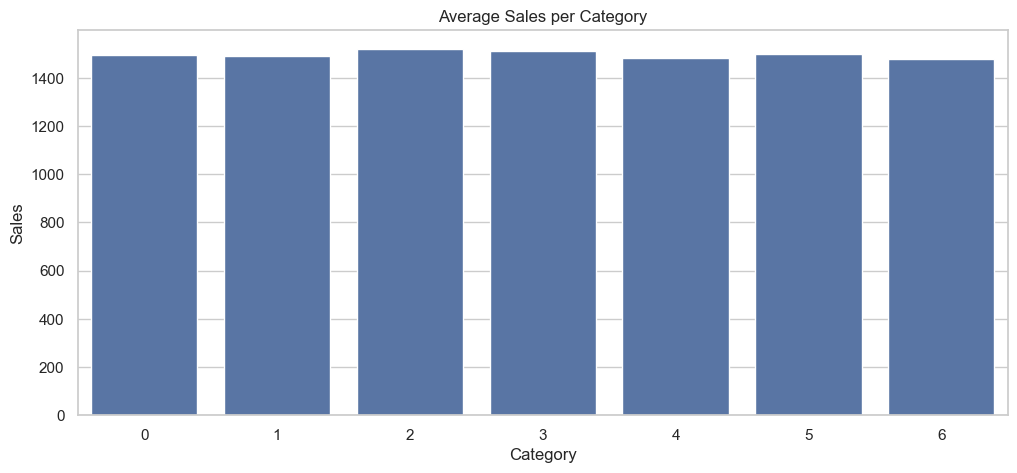

C:\Users\Sumanth\AppData\Local\Temp\ipykernel_46172\1323773504.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sub Category', y='Sales', data=df, ci=None, estimator=np.mean)


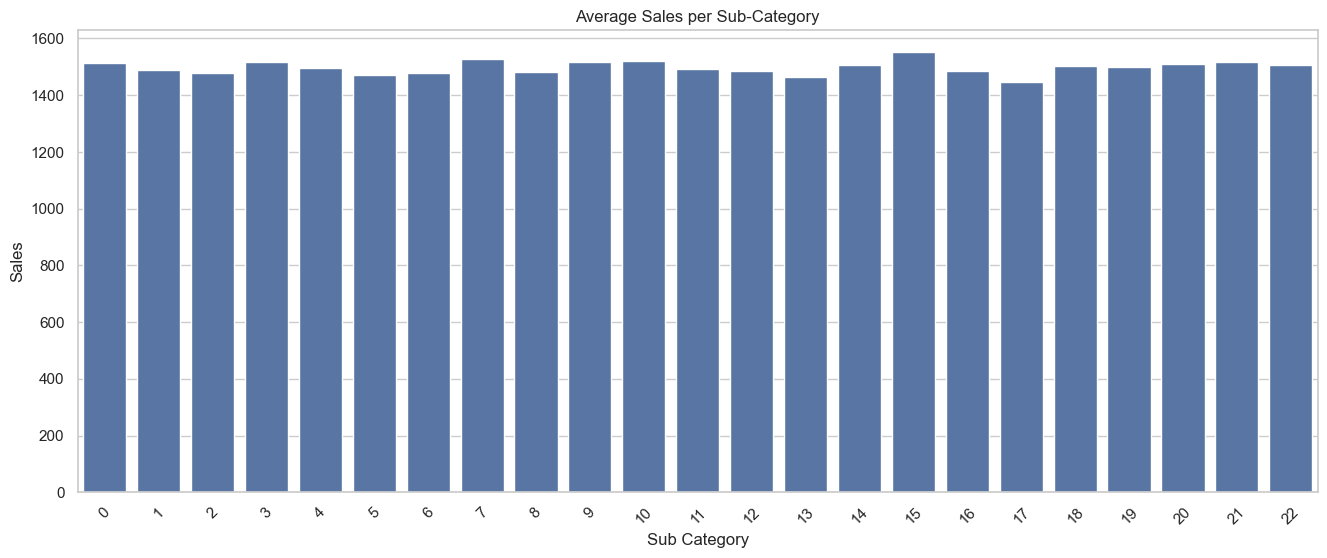

In [37]:
#Product/Category Analysis
#Average sales per category and sub-category
plt.figure(figsize=(12,5))
sns.barplot(x='Category', y='Sales', data=df, ci=None, estimator=np.mean)
plt.title('Average Sales per Category')
plt.show()

plt.figure(figsize=(16,6))
sns.barplot(x='Sub Category', y='Sales', data=df, ci=None, estimator=np.mean)
plt.title('Average Sales per Sub-Category')
plt.xticks(rotation=45)
plt.show()

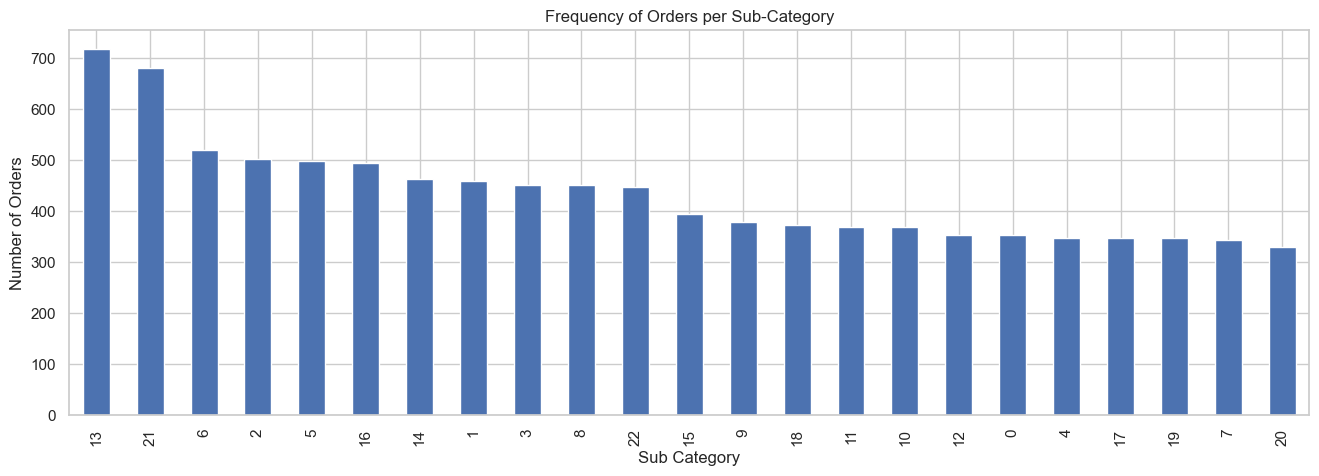

In [38]:
#frequencies of sub-categories sold
plt.figure(figsize=(16,5))
df['Sub Category'].value_counts().plot(kind='bar')
plt.title('Frequency of Orders per Sub-Category')
plt.ylabel('Number of Orders')
plt.show()

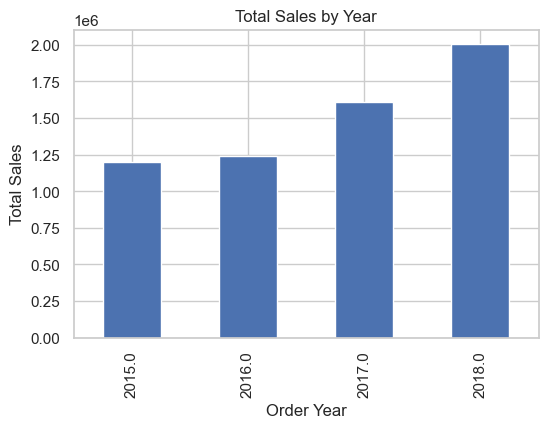

In [39]:
#Time-based Analysis (Hour Not Present, But You Can Analyze by Day/Month/Year)
#Sales trend by year
yearly_sales = df.groupby('Order Year')['Sales'].sum()
yearly_sales.plot(kind='bar', figsize=(6,4), title='Total Sales by Year')
plt.ylabel('Total Sales')
plt.show()

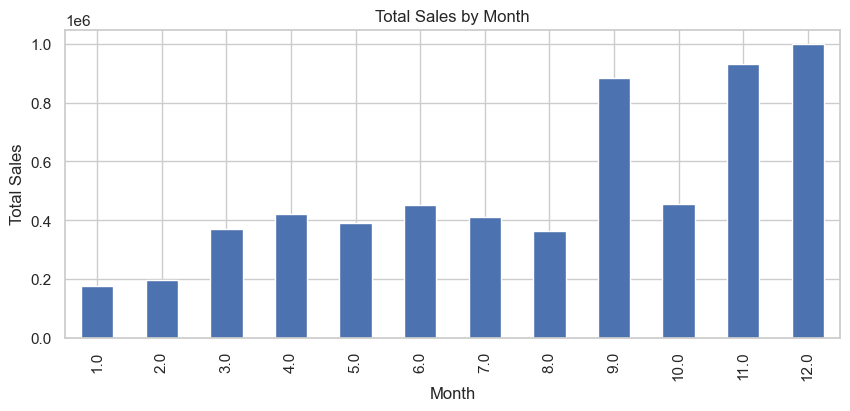

In [40]:
#Sales trend by Month
monthly_sales = df.groupby('Order Month')['Sales'].sum().sort_index()
monthly_sales.plot(kind='bar', figsize=(10,4), title='Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

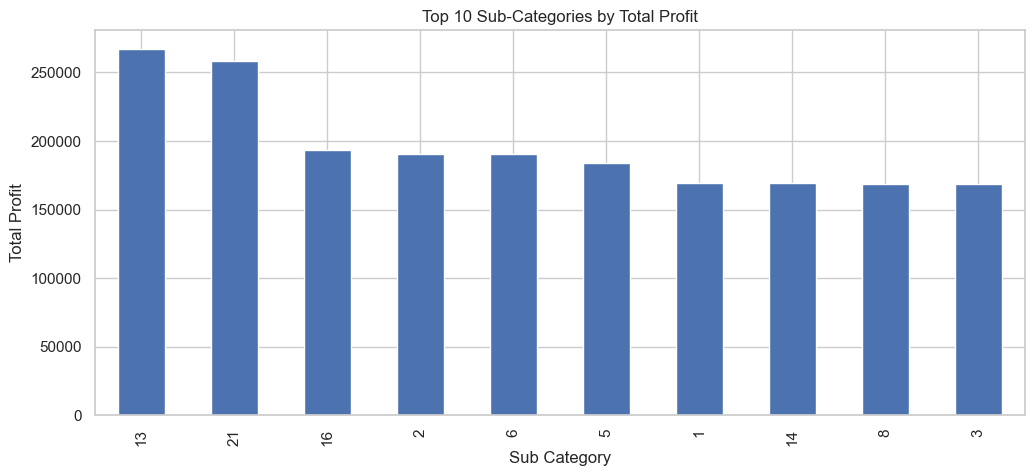

In [41]:
#Profit margin analysis
#top sub categories by total profit
subcat_profit = df.groupby('Sub Category')['Profit'].sum().sort_values(ascending=False)
subcat_profit.head(10).plot(kind='bar', figsize=(12,5), title='Top 10 Sub-Categories by Total Profit')
plt.ylabel('Total Profit')
plt.show()